# Test Other Types of Analysis on Larger Data Set

This notebook tests other types of analyses with 7.5 hours worth of data.

## Table of Contents:
* [Import and Organize Data](#Header-1)
* [Plot Certain Hourly PM Averages](#Header-2)
* [Convert Time to Local Time](#Header-3)
* [Plot Rolling Mean](#Header-4)
* [Add Threshold Line](#Header-5)
* [Sample AQI Calculation](#Header-6)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Import and Organize Data <a class="anchor" id="Header-1"></a>

In [3]:
directory = os.listdir(r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-12')
j = 0
data = [''] * len(directory)
for i in directory:
    path = r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\AQ_test_07-12' + "\\" + i
    data[j] = pd.read_csv(path)
    j = j + 1

table = pd.concat([data[0], data[1]], ignore_index=True)
for i in range(2,len(data)):
    table = pd.concat([table,data[i]],ignore_index=True)
    
table["datetime"] = pd.to_datetime(table["datetime"],unit='s',origin='unix')

## Plot Certain Hourly PM Averages <a class="anchor" id="Header-2"></a>

Plot the hourly PM2.5 averages:

Text(0.5, 1.0, 'Average PM2.5 Concentration Per Hour During Test')

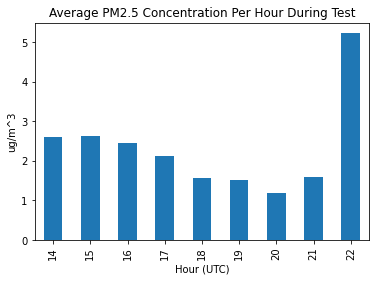

In [4]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (UTC)')
plt.ylabel('ug/m^3')
plt.title("Average PM2.5 Concentration Per Hour During Test")

Plot the hourly PM1.0 averages:

Text(0.5, 1.0, 'Average PM1.0 Concentration Per Hour During Test')

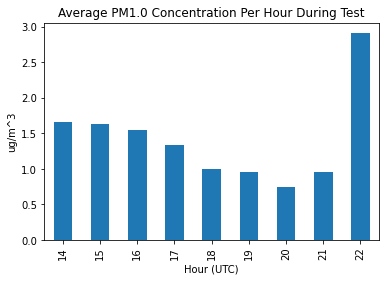

In [5]:
table.groupby(table["datetime"].dt.hour)["PM1.0"].mean().plot(kind='bar')
plt.xlabel('Hour (UTC)')
plt.ylabel('ug/m^3')
plt.title("Average PM1.0 Concentration Per Hour During Test")

### Are PM5.0 and PM10 always the same?

Text(0.5, 1.0, 'Average PM5.0 Concentration Per Hour During Test')

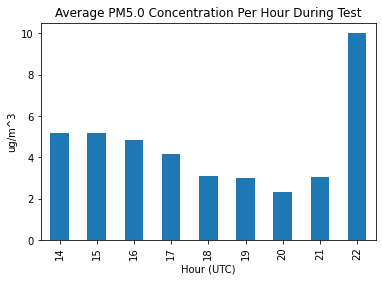

In [6]:
table.groupby(table["datetime"].dt.hour)["PM5.0"].mean().plot(kind='bar')
plt.xlabel('Hour (UTC)')
plt.ylabel('ug/m^3')
plt.title("Average PM5.0 Concentration Per Hour During Test")

Text(0.5, 1.0, 'Average PM10 Concentration Per Hour During Test')

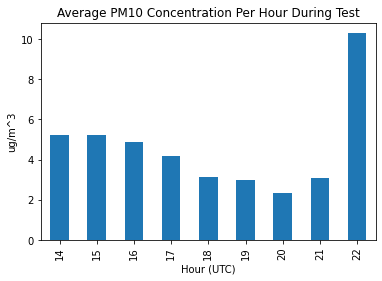

In [7]:
table.groupby(table["datetime"].dt.hour)["PM10"].mean().plot(kind='bar')
plt.xlabel('Hour (UTC)')
plt.ylabel('ug/m^3')
plt.title("Average PM10 Concentration Per Hour During Test")

## Convert Time to Local Time <a class="anchor" id="Header-3"></a>

Convert time to local time (EDT)

Text(0.5, 1.0, 'Average PM2.5 Concentration Per Hour During Test')

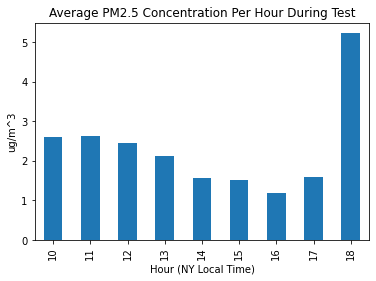

In [8]:
table["datetime"] = table["datetime"].dt.tz_localize('utc').dt.tz_convert('America/New_York')
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM2.5 Concentration Per Hour During Test")

## Plot Rolling Mean <a class="anchor" id="Header-4"></a>

Try plotting a rolling mean over the time period.

Construct separate dataframe and generate hourly rolling averge:

In [28]:
PMStruct = pd.DataFrame(table)[['datetime','PM2.5']]
PMStruct['Rolling Average'] = PMStruct.rolling(3600).mean()

Plot PM2.5 Hourly Rolling Average:

Text(0.5, 1.0, 'Rolling Hourly Average PM2.5 Value During Test')

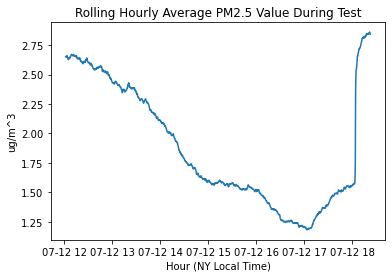

In [26]:
plt.plot(PMStruct['datetime'],PMStruct['Rolling Average'])
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.title("Rolling Hourly Average PM2.5 Value During Test")

Note that window size is based on integers (index number) and not actual timestamps. Therefore the window is not exactly 1 hour long, due to skipped seconds.

## Add Threshold Line <a class="anchor" id="Header-5"></a>

Try plotting graphs with a threshold for dangerous PM values.

Text(0.5, 1.0, 'Average PM2.5 Concentration Per Hour During Test')

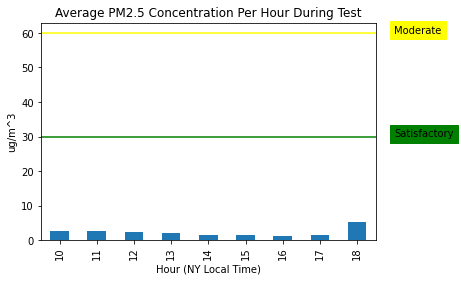

In [54]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (NY Local Time)')
plt.ylabel('ug/m^3')
plt.axhline(30, color="green")
plt.text(9,30,"Satisfactory",backgroundcolor="green",horizontalalignment="left")
plt.axhline(60, color="yellow")
plt.text(9,60,"Moderate",backgroundcolor="yellow",horizontalalignment="left")
#plt.axhline(90, color="orange")
#plt.text(9,90,"Poor",backgroundcolor="orange",horizontalalignment="left")
#plt.axhline(120, color="red")
#plt.text(9,120,"Very Poor",backgroundcolor="red",horizontalalignment="left")
plt.title("Average PM2.5 Concentration Per Hour During Test")

## Sample AQI Calculation <a class="anchor" id="Header-6"></a>

Perform a sample AQI Calculation based on average PM2.5. Note that ordinarily AQI is calculated from a 24-hour average.

`[(AQIHi - AQILo)/(ConcHi - ConcLo)]*(ConcIn - ConcLo) + AQILo`

`ConcIn = Input concentration for a given pollutant
ConcLo = The concentration breakpoint that is less than or equal to Conci
ConcHi = The concentration breakpoint that is greater than or equal to Conci
AQILo = The AQI value/breakpoint corresponding to ConcLo
AQIHi = The AQI value/breakpoint corresponding to ConcHi`

In [62]:
# In this case we know it's in the "good" category:
AQIHi = 50.0
AQILo = 0.0
ConcHi = 12.0
ConcLo = 0.0
ConcIn = table["PM2.5"].mean()

AQLev = (AQIHi - AQILo)
AQLev = (AQLev)/(ConcHi - ConcLo)
AQLev = AQLev*(ConcIn - ConcLo)
AQLev = AQLev + AQILo
print("Current AQ Level:",round(AQLev))
if round(AQLev) < 30:
    print("AQ Level = Good")

Current AQ Level: 8
AQ Level = Good
